<a href="https://colab.research.google.com/github/starvar7169/leadbasic/blob/main/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv("Netflix_Historical_StockPrice2.csv")
print(data.shape)
print(data.describe())
print(data.isnull().sum())

(1260, 7)
              Open         High          Low        Close    Adj Close  \
count  1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean    292.419810   296.933730   287.681095   292.472302   292.472302   
std     135.356764   137.677319   132.811799   135.274699   135.274699   
min      85.430000    86.500000    84.500000    85.330002    85.330002   
25%     160.012501   161.159996   157.865002   159.867504   159.867504   
50%     308.220001   313.744995   302.919998   309.014999   309.014999   
75%     371.059998   376.107498   364.540001   370.585007   370.585007   
max     582.450012   593.289978   570.400024   586.340027   586.340027   

             Volume  
count  1.260000e+03  
mean   8.451711e+06  
std    5.513675e+06  
min    1.144000e+06  
25%    5.018600e+06  
50%    6.938700e+06  
75%    1.006235e+07  
max    5.841040e+07  
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


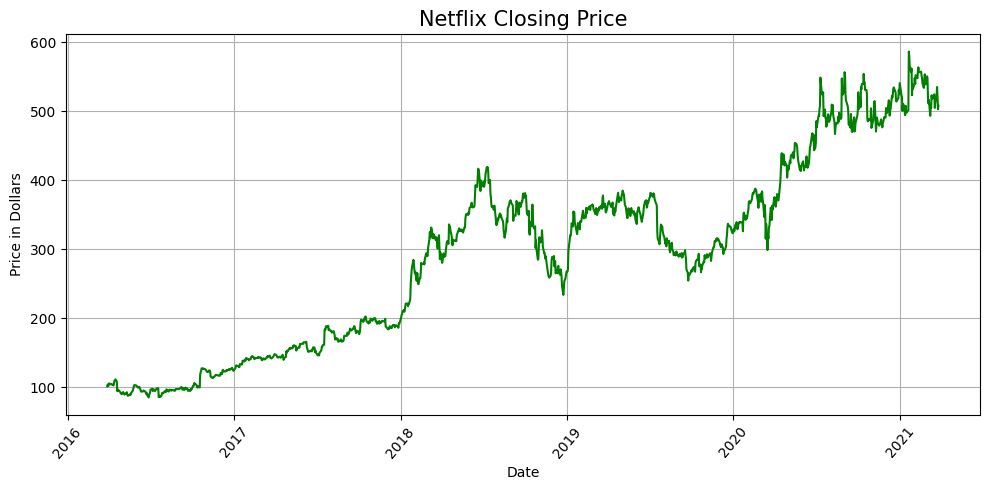

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
plt.figure(figsize=(10, 5))
plt.plot_date(data['Date'],data['Close'] ,'g')
plt.title('Netflix Closing Price', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Price in Dollars')
plt.xticks(rotation=50)
#mplcursors.cursor(hover=True)
#import mplcursors
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
data[data['Close']==data['Adj Close']].shape

(1260, 7)

In [ ]:
data.drop({'Adj Close'}, axis=1, inplace=True)
print(data)

            Date        Open        High         Low       Close    Volume
0     2016-03-28   98.339996  101.440002   97.820000  101.209999  12432200
1     2016-03-29  101.080002  104.330002  101.000000  104.129997  16008900
2     2016-03-30  104.650002  104.910004  101.480003  102.190002  14705000
3     2016-03-31  102.430000  103.529999  101.050003  102.230003   9747500
4     2016-04-01  102.930000  105.790001  102.470001  105.699997  14182400
...          ...         ...         ...         ...         ...       ...
1255  2021-03-22  509.130005  529.309998  509.130005  523.109985   3360600
1256  2021-03-23  529.869995  543.119995  529.400024  535.090027   5583500
1257  2021-03-24  533.780029  534.419983  520.000000  520.809998   4102200
1258  2021-03-25  516.989990  518.530029  497.000000  502.859985   4926800
1259  2021-03-26  502.820007  508.720001  496.679993  508.049988   3464200

[1260 rows x 6 columns]


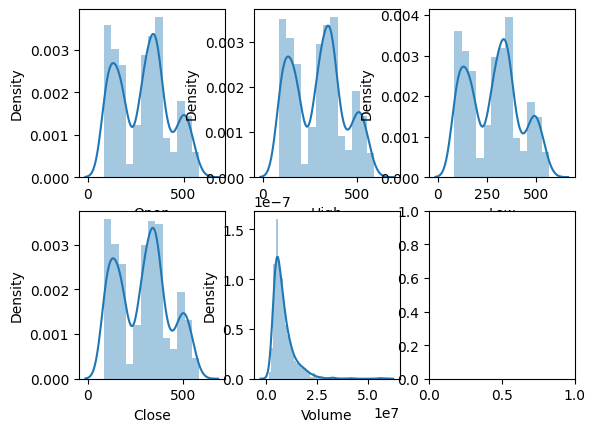

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
features=['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(2, 3)
for i, col in enumerate(features):
  plt.subplot(2, 3, i+1)
  sns.distplot(data[col])
plt.show()

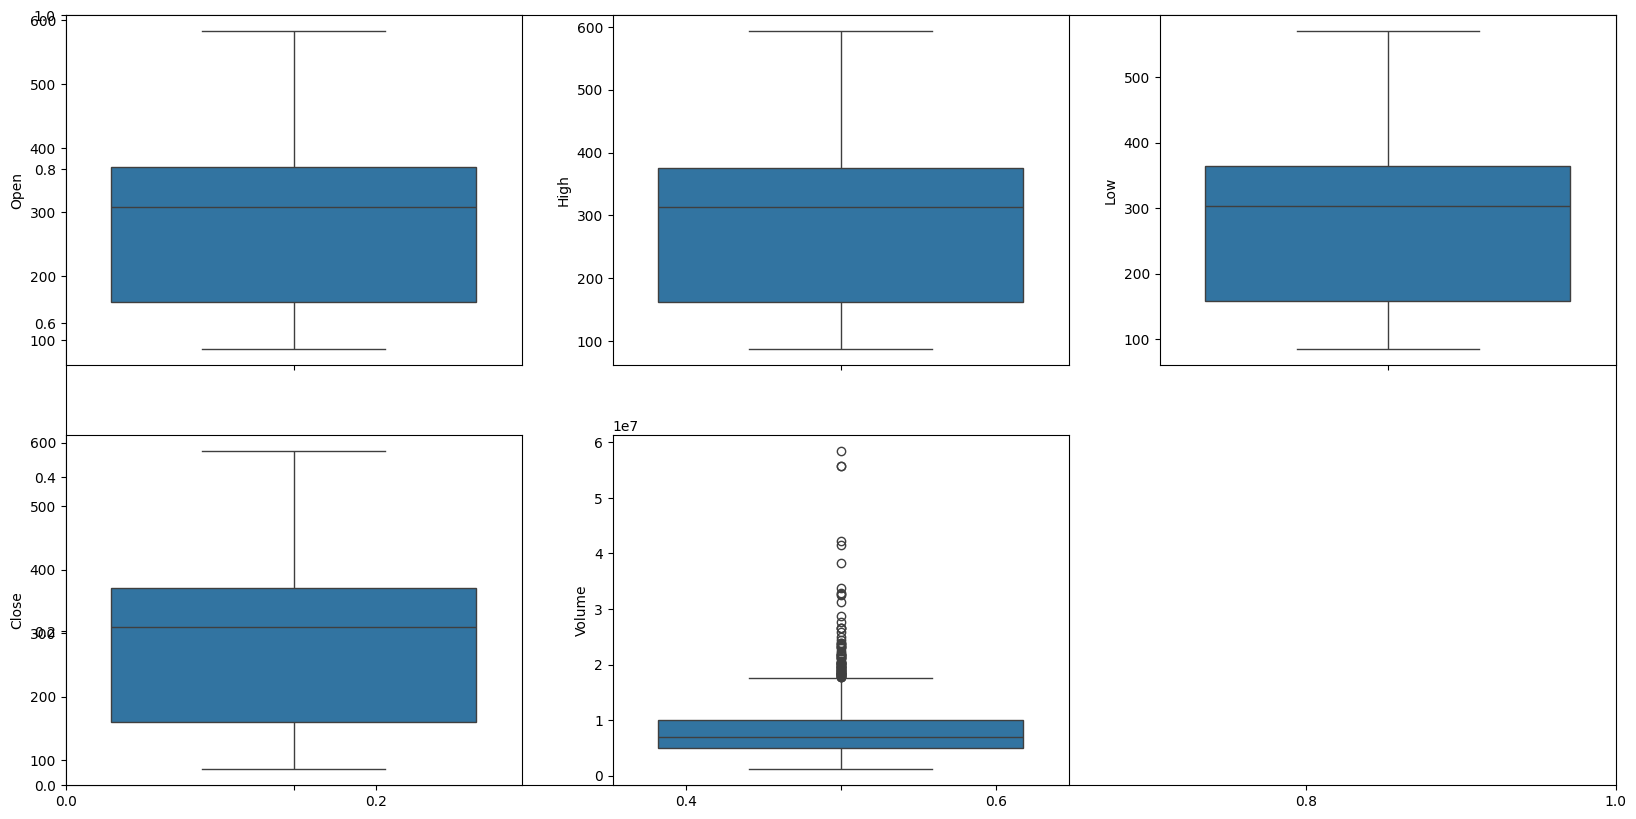

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2, 3, i+1)
  sns.boxplot(data[col])
plt.show()

volume plot contains outliers

In [ ]:
splitted= data['Date'].str.split('-', expand= True)
data['day']= splitted[2].astype('int')
data['month']= splitted[1].astype('int')
data['year']=splitted[0].astype('int')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2016-03-28,98.339996,101.440002,97.820000,101.209999,101.209999,12432200,28,3,2016
1,2016-03-29,101.080002,104.330002,101.000000,104.129997,104.129997,16008900,29,3,2016
2,2016-03-30,104.650002,104.910004,101.480003,102.190002,102.190002,14705000,30,3,2016
3,2016-03-31,102.430000,103.529999,101.050003,102.230003,102.230003,9747500,31,3,2016
4,2016-04-01,102.930000,105.790001,102.470001,105.699997,105.699997,14182400,1,4,2016


In [ ]:
data['quarter_end']=np.where(data['month']%3==0, 1, 0)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,quarter_end
0,2016-03-28,98.339996,101.440002,97.820000,101.209999,101.209999,12432200,28,3,2016,1
1,2016-03-29,101.080002,104.330002,101.000000,104.129997,104.129997,16008900,29,3,2016,1
2,2016-03-30,104.650002,104.910004,101.480003,102.190002,102.190002,14705000,30,3,2016,1
3,2016-03-31,102.430000,103.529999,101.050003,102.230003,102.230003,9747500,31,3,2016,1
4,2016-04-01,102.930000,105.790001,102.470001,105.699997,105.699997,14182400,1,4,2016,0


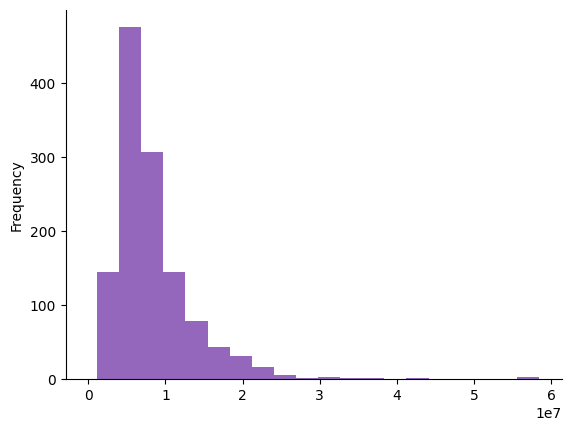

In [ ]:


from matplotlib import pyplot as plt
for i, col in enumerate(features):
  data[col].plot(kind='hist', bins=20)
  plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()